In [50]:
!pip install mido pandas
!wget http://hog.ee.columbia.edu/craffel/lmd/lmd_full.tar.gz
!tar -xvzf lmd_full.tar.gz
!ls lmd_full  # Adjust the path if necessary
!wget https://colinraffel.com/projects/lmd/match_scores.json
!pip install pretty_midi
!pip install plotting
import pretty_midi
import numpy as np
import joblib
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

Streaming output truncated to the last 5000 lines.
lmd_full/3/357f75d66b339ea3d078600845a35d76.mid
lmd_full/3/34398fb8a43459b73bc58c878555b050.mid
lmd_full/3/3be14af0882a38466fbb0bf32040244e.mid
lmd_full/3/30b10d64babe20f18c56fe2ed06bf10e.mid
lmd_full/3/3a63b0f162ee8565a7f0d982355441df.mid
lmd_full/3/3ecaae39b6a1a4dc8be8076dbc2d9fc5.mid
lmd_full/3/323da12d013866a4e0b04bb95aea43ca.mid
lmd_full/3/3774aa143342a29e5f3261fa0ac78bb1.mid
lmd_full/3/355e544fd32fed754b768d5b4ed7feb8.mid
lmd_full/3/3348255295847493c31f4f5598d037df.mid
lmd_full/3/3113806896a40955de5870c665c5c4cf.mid
lmd_full/3/32c9d1a51b53c14f81564ee289cc808f.mid
lmd_full/3/3bd8b0af8303bb25f8bd960e27b42bd7.mid
lmd_full/3/3d289f178da9c32c14cee6d9df79de2a.mid
lmd_full/3/3742d507a6ea8fc7f67afa51597269be.mid
lmd_full/3/323416c8b1eb5c3e5b29e0cf7a46c92e.mid
lmd_full/3/36273ccf78184e379b82df61cdbc1c1c.mid
lmd_full/3/38e7c24144cfd36b862845ba13e7e2c1.mid
lmd_full/3/3a061067892d3a3b9b049fb4239ae51d.mid
lmd_full/3/3a8da160ed45f48d5c7e0e76ae

In [52]:
def compute_statistics(midi_file):
    """
    Given a path to a MIDI file, compute a dictionary of statistics about it

    Parameters
    ----------
    midi_file : str
        Path to a MIDI file.

    Returns
    -------
    statistics : dict
        Dictionary reporting the values for different events in the file.
    """
    # Some MIDI files will raise Exceptions on loading, if they are invalid.
    # We just skip those.
    try:
        pm = pretty_midi.PrettyMIDI(midi_file)
        # Extract informative events from the MIDI file
        return {'n_instruments': len(pm.instruments), #Makes a dictioanry of the data
                'program_numbers': [i.program for i in pm.instruments if not i.is_drum],
                'key_numbers': [k.key_number for k in pm.key_signature_changes],
                'tempos': list(pm.get_tempo_changes()[1]),
                'time_signature_changes': pm.time_signature_changes,
                'end_time': pm.get_end_time(),
                'lyrics': [l.text for l in pm.lyrics],
                'tempo_estimate': pm.estimate_tempo()}
    # Silently ignore exceptions for a clean presentation (sorry Python!)
    except Exception as e:
        pass

In [54]:
with open('match_scores.json', 'r') as f:# open the file and make it a dictionary
    scores = json.load(f)

data_dict = []

for key in list(scores.keys())[:5]: #loop through dictionary
    try:
      matches = scores[key]
      midi_md5 = list(matches.keys())[0] #Grabs the entire file name
      folder = midi_md5[0]  ##first char to find the folder
      file_path = f'lmd_full/{folder}/{midi_md5}.mid' #combine to get the file
      statistics = compute_statistics(file_path) #get stats of file
      print(statistics)
      data_dict.append(statistics) # add it to a list
    except Exception as e:
      print(f'Error processing {filename}: {e}')

# Create a DataFrame
df_dict = pd.DataFrame(data_dict) #create the df

# Save to CSV
df_dict.to_csv('dictionary_data.csv', index=False) #create a csv that can be used later
df_dict

/usr/local/lib/python3.10/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


{'n_instruments': 10, 'program_numbers': [68, 40, 40, 41, 42, 43, 6, 6, 48, 48], 'key_numbers': [], 'tempos': [130.00013000013, 129.00007740004645, 128.0, 127.00025400050801, 126.00012600012602, 125.0, 123.00022140039852, 122.00006913337249, 121.00018755029072, 120.0, 119.00016065021687, 118.0001337334849, 117.00011700011699, 116.00008506672903, 115.0000287500072, 114.0001710002565, 113.00009605008164, 112.00005973336519, 111.00011100011099, 110.00011000011, 109.00014170018423, 108.000108000108, 106.00013780017916, 105.000105000105, 104.00001386666852, 103.0000480666891, 102.0000510000255, 101.00006901671382, 99.99999999999999, 99.000099000099, 130.00013000013], 'time_signature_changes': [TimeSignature(numerator=4, denominator=4, time=0.0)], 'end_time': 200.98055209375, 'lyrics': [], 'tempo_estimate': 249.18842005688398}
{'n_instruments': 5, 'program_numbers': [35, 0, 48, 0], 'key_numbers': [], 'tempos': [99.99999999999999], 'time_signature_changes': [TimeSignature(numerator=4, denomin

,n_instruments,program_numbers,key_numbers,tempos,time_signature_changes,end_time,lyrics,tempo_estimate
0,10,"[68, 40, 40, 41, 42, 43, 6, 6, 48, 48]",[],"[130.00013000013, 129.00007740004645, 128.0, 1...",[4/4 at 0.00 seconds],200.980552,[],249.188420
1,5,"[35, 0, 48, 0]",[],[99.99999999999999],[4/4 at 0.00 seconds],148.759375,[],206.401925
2,12,"[26, 78, 25, 27, 16, 32, 122, 22, 61, 65, 57]",[],"[104.00145602038427, 99.000099000099]",[4/4 at 0.00 seconds],174.434766,[],232.838337
3,14,"[35, 32, 4, 26, 49, 60, 58, 48, 0, 24, 29, 29,...",[1],[82.00003553334874],[4/4 at 0.00 seconds],337.080647,"[\r, Hearts , of , fire , cre, ate , love , de...",184.622834
4,11,"[24, 25, 33, 25, 48, 5, 16, 66, 61, 16]",[0],[75.0],[4/4 at 0.00 seconds],275.600000,"[ClavedePrata , 0xx.34.268.5855 , 0xx.34.268.5...",160.686695


(array([1., 0., 0., 0., 0., 1., 1., 1., 0., 1.]),
 array([ 5. ,  5.9,  6.8,  7.7,  8.6,  9.5, 10.4, 11.3, 12.2, 13.1, 14. ]),
 <BarContainer object of 10 artists>)

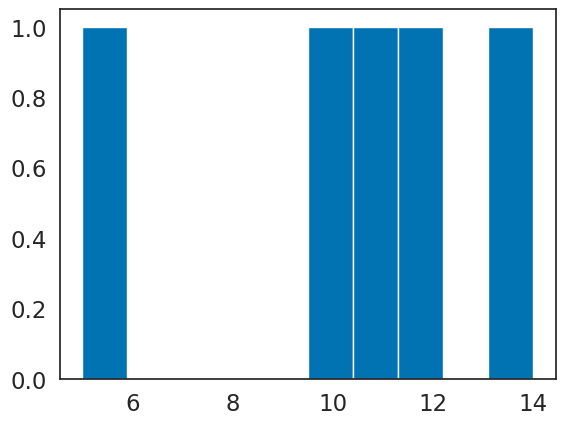

In [55]:
plt.hist(df_dict['n_instruments'])

(array([1., 0., 1., 0., 0., 1., 0., 0., 1., 1.]),
 array([160.68669528, 169.53686776, 178.38704023, 187.23721271,
        196.08738519, 204.93755767, 213.78773015, 222.63790262,
        231.4880751 , 240.33824758, 249.18842006]),
 <BarContainer object of 10 artists>)

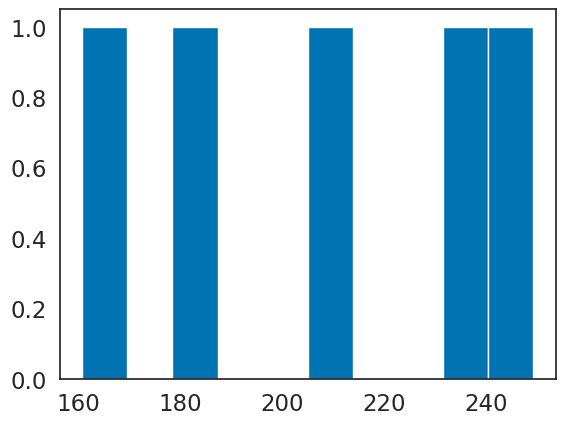

In [56]:
plt.hist(df_dict['tempo_estimate'])

(array([[2., 0., 0., 7., 0., 1., 0., 0., 0., 0.],
        [2., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 2., 4., 0., 1., 2., 1., 0., 0., 1.],
        [2., 1., 6., 1., 3., 0., 0., 0., 0., 0.],
        [1., 3., 3., 1., 0., 2., 0., 0., 0., 0.]]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <a list of 5 BarContainer objects>)

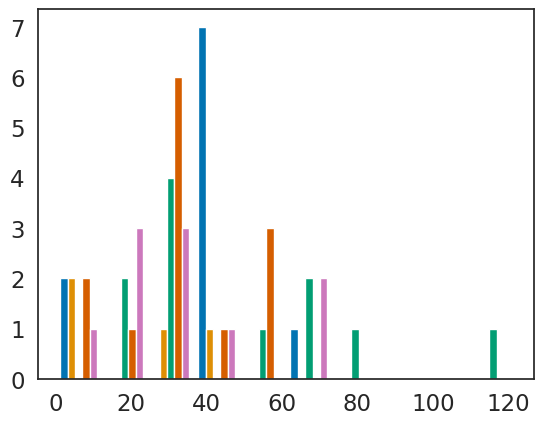

In [57]:
plt.hist(df_dict['program_numbers'])